# Week2授業課題２　富士下山問題

### 【問題1】データの可視化

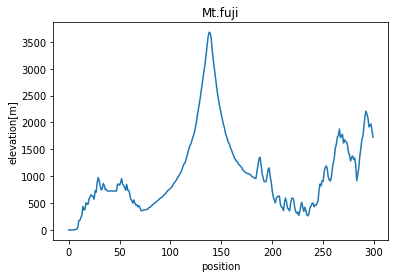

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
plt.title("Mt.fuji")
plt.xlabel("position") # その地点の番号
plt.ylabel("elevation[m]") # 標高
plt.plot(fuji[:,0,], fuji[:,3])
plt.show()

### 【問題2】ある地点の勾配を計算する関数を作成

In [6]:
def compute_slope(i):
    # 標高の変化量
    position_amount = fuji[i, 0] - fuji[i-1, 0]
    elevation_amount = fuji[i, 3] - fuji[i-1, 3]

    slope = elevation_amount/position_amount

    return slope

i = 100
compute_slope(i)


18.90000000000009

### 【問題3】移動先の地点を計算する関数を作成

In [21]:
# 今いる地点 position,異動先の地点　next_position, a=0.2

def move_point(position):
    a = 0.2
    next_position = position - (a*compute_slope(position))
    if next_position < 0:
        print("次は０地点に行ってください")
    return int(next_position.round(decimals=0)) # 整数値じゃないとcompute_slope関数で配列の場所が指定できない
position = 100
print(move_point(position))

96


### 【問題4】山を下る関数を作成

In [33]:
def down_mt_fuji(position):
    # 初期化（最初の位置をリストへ登録しておく）
    position_list = np.empty
    position_list.append(position)

    # 下山地点が更新されなくなるまで繰り返す
    while True:
        position = move_point(position) # 次の地点を関数を使って算出して更新
        if position == position_list[-1]: # 更新地点と今の地点とが同じか判定
            break # 今の地点と同じだったら、それ以上更新しないので、そこが下山最終地点
        else:
            position_list.append(position) # リストを更新して再度ループ

    return position_list
    
position = 136 # 最初は 136 ポジションから
position_list = down_mt_fuji(position) # 戻り値は下山地点リストが欲しい
print(position_list)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]


### 【問題5】下山過程の可視化

0
3434.59
[3434.59]
1
817.62
[817.62]
2
741.17
[741.17]
3
672.36
[672.36]
4
631.71
[631.71]
5
575.07
[575.07]
6
505.1
[505.1]
7
458.66
[458.66]
8
418.41
[418.41]
9
368.91
[368.91]
10
412.27
[412.27]
11
390.14
[390.14]
12
386.64
[386.64]
13
371.19
[371.19]
[371.19]
[371.19]


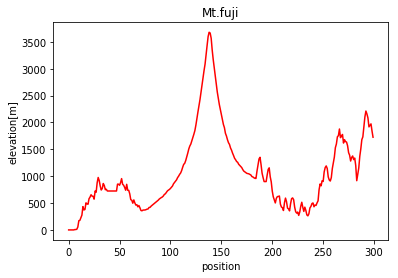

In [64]:
for i in range(len(position_list)):
    elevation_list = []
#     print(fuji[position_list[i],3])
    elevation_list.append(fuji[position_list[i],3])
    print(i)
    print(fuji[position_list[i],3])
    print(elevation_list)

print(elevation_list)
elevation_list = np.array(elevation_list)
print(elevation_list)

# elevation_list.reshape(14,1)

plt.title("Mt.fuji")
plt.xlabel("position") # その地点の番号
plt.ylabel("elevation[m]") # 標高
plt.plot(fuji[:,0,], fuji[:,3],color="r")
# plt.plot(position_list,elevation_list)
plt.show()

### 【問題6】初期値の変更

### 【問題7】（アドバンス問題）ハイパーパラメータの変更